In [23]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")
df

<ipython-input-4-63159dfe95d1>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


In [ ]:
#Top 10 state for Men in 2021
df_2021 = df[df['Date'].str.contains('2021')]
df_state_men_2021 = df_2021.loc[df_2021["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1_2021 = df_state_men_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Men in 2021")
print(tabulate(df1_2021.head(10), headers='keys', tablefmt='psql'))

#Top 10 state for Women in 2021
df_state_women_2021 = df_2021.loc[df_2021["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2_2021 = df_state_women_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Women in 2021")
print(tabulate(df2_2021.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    3384 |
| 70 | TX      |    3037 |
| 16 | FL      |    1781 |
| 51 | OH      |    1529 |
| 55 | PA      |    1183 |
| 72 | VA      |    1156 |
| 38 | NC      |    1109 |
| 50 | NY      |    1033 |
| 17 | GA      |     935 |
| 34 | MO      |     893 |
+----+---------+---------+
Top 10 states for Women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    1578 |
| 63 | TX      |    1572 |
| 13 | FL      |     921 |
| 47 | OH      |     680 |
| 35 | NC      |     635 |
| 65 | VA      |     542 |
| 46 | NY      |     530 |
| 51 | PA      |     502 |
| 29 | MI      |     478 |
| 24 | LA      |     473 |
+----+---------+---------+


<ipython-input-6-a7371dca8ac1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()


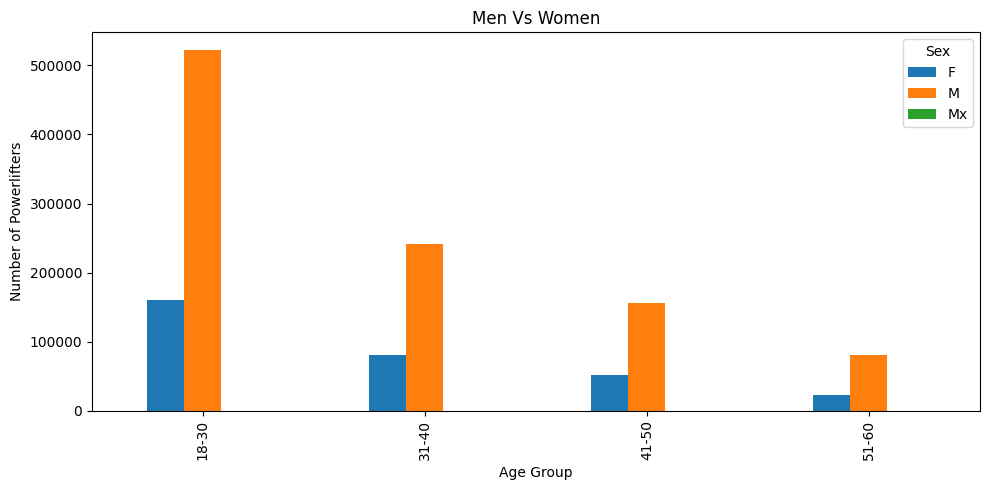

In [ ]:
import matplotlib.pyplot as plt
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert the list to a NumPy array
age_groups_array = np.array(['18-30', '31-40', '41-50', '51-60'])

# Calculate counts for each age group and sex and unstack the Sex index level to columns
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()

# Plot bar chart
age_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men Vs Women')
plt.legend(title='Sex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-20-d9939b9ca4c7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_male_counts = male_df.groupby(['AgeGroup'])['Sex'].value_counts()


,,count
AgeGroup,Sex,
18-30,M,521885
31-40,M,240808
41-50,M,155554
51-60,M,80849


<ipython-input-20-d9939b9ca4c7>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_female_counts= female_df.groupby(['AgeGroup'])['Sex'].value_counts()


,,count
AgeGroup,Sex,
18-30,F,160365
31-40,F,80369
41-50,F,51208
51-60,F,23097


,0
AgeGroup,
18-30,682261
31-40,321178
41-50,206762
51-60,103946


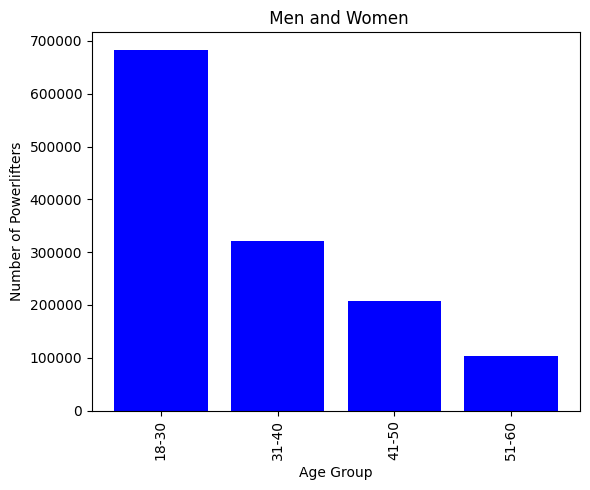

In [20]:
import matplotlib.pyplot as plt
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter for male participants before grouping
male_df = df[df['Sex'] == 'M']
female_df= df[df['Sex'] == 'F']
# Calculate counts for each age group among males and unstack
age_male_counts = male_df.groupby(['AgeGroup'])['Sex'].value_counts()
display (age_male_counts)
age_female_counts= female_df.groupby(['AgeGroup'])['Sex'].value_counts()
display (age_female_counts)
# Calculate the total count for each age group
total_counts = age_sex_counts.sum(axis=1)
display(total_counts)

# Plot the combined bar chart
plt.figure(figsize=(6, 5))
plt.bar(total_counts.index, total_counts, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title(' Men and Women')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

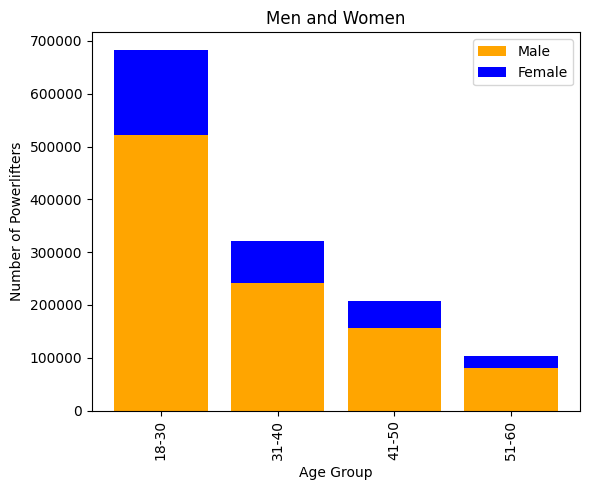

In [25]:
import matplotlib.pyplot as plt

age_groups = [str(group) for group in age_male_counts.index.get_level_values('AgeGroup').unique()]

male_counts = age_male_counts.values
female_counts = age_female_counts.values

# Create a bar chart
plt.figure(figsize=(6, 5))
plt.bar(age_groups, male_counts, color='orange', label='Male')
plt.bar(age_groups, female_counts, bottom=male_counts, color='blue', label='Female')
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men and Women')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

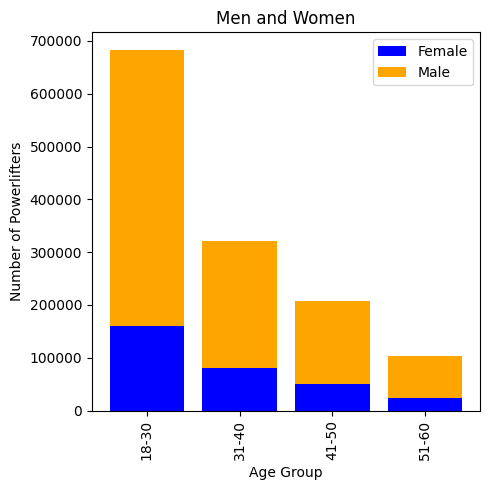

In [29]:
plt.figure(figsize=(5, 5))
plt.bar(age_groups, female_counts,color='blue', label='Female')
plt.bar(age_groups, male_counts,bottom=female_counts, color='orange', label='Male')
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men and Women')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

stacked bar graph

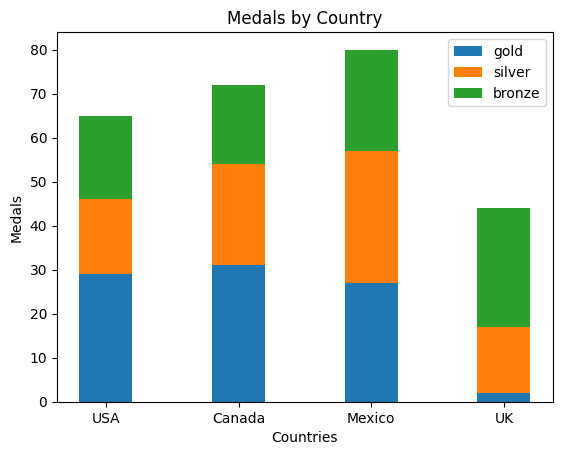

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = ["USA", "Canada", "Mexico", "UK"] # Removed "Germany"

gold = [29, 31, 27, 2]
silver = [17, 23, 30, 15]
bronze = [19, 18, 23, 27]
b_bronze = list(np.add(gold ,silver))
plt.bar(x,gold,0.4,label="gold")
plt.bar(x,silver,0.4,bottom=gold,label="silver")
plt.bar(x,bronze,0.4,bottom=b_bronze,label="bronze")

plt.xlabel("Countries")
plt.ylabel("Medals")
plt.title("Medals by Country")

plt.legend()
plt.show()

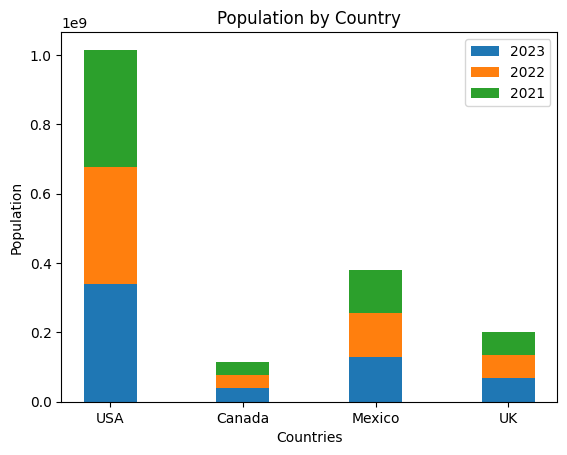

In [39]:
import matplotlib.pyplot as plt
import numpy as np

countries = ["USA", "Canada", "Mexico", "UK"]
population_2023 = [339996563, 38454327, 128455567, 67508936]
population_2022 = [338289857, 38246108, 126014024, 67326571]
population_2021 = [336997624, 37963503, 124574795, 67081231]

b_2022 = list(np.add(population_2023, population_2022))

plt.bar(countries, population_2023, 0.4, label="2023")
plt.bar(countries, population_2022, 0.4, bottom=population_2023, label="2022")
plt.bar(countries, population_2021, 0.4, bottom=b_2022, label="2021")

plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("Population by Country")

plt.legend()
plt.show()


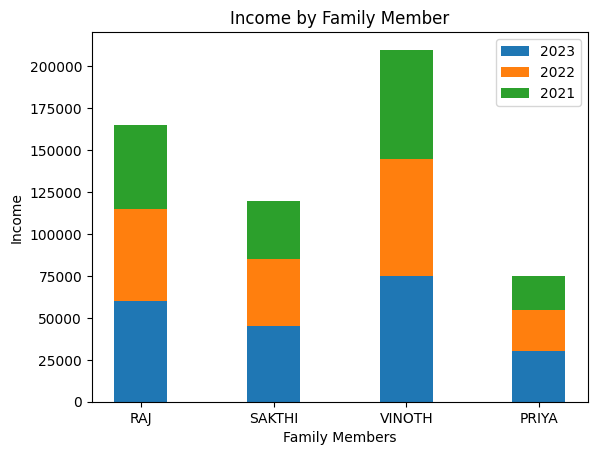

In [41]:
# prompt: create a similar program for income in family members

import matplotlib.pyplot as plt
import numpy as np

family_members = ["RAJ", "SAKTHI", "VINOTH", "PRIYA"]
income_2023 = [60000, 45000, 75000, 30000]
income_2022 = [55000, 40000, 70000, 25000]
income_2021 = [50000, 35000, 65000, 20000]

b_2022 = list(np.add(income_2023, income_2022))

plt.bar(family_members, income_2023, 0.4, label="2023")
plt.bar(family_members, income_2022, 0.4, bottom=income_2023, label="2022")
plt.bar(family_members, income_2021, 0.4, bottom=b_2022, label="2021")

plt.xlabel("Family Members")
plt.ylabel("Income")
plt.title("Income by Family Member")

plt.legend()
plt.show()


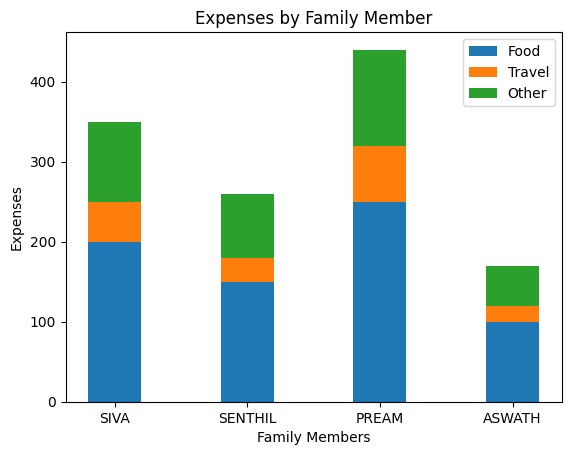

In [43]:
family_members = ["SIVA", "SENTHIL", "PREAM", "ASWATH"]
food_expenses = [200, 150, 250, 100]
travel_expenses = [50, 30, 70, 20]
other_expenses = [100, 80, 120, 50]

b_travel = list(np.add(food_expenses, travel_expenses))

plt.bar(family_members, food_expenses, 0.4, label="Food")
plt.bar(family_members, travel_expenses, 0.4, bottom=food_expenses, label="Travel")
plt.bar(family_members, other_expenses, 0.4, bottom=b_travel, label="Other")

plt.xlabel("Family Members")
plt.ylabel("Expenses")
plt.title("Expenses by Family Member")

plt.legend()
plt.show()
